In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

In [3]:
races_dict = {
    "giro":"https://www.procyclingstats.com/race/giro-d-italia/2022/gc/history/longest-race",
    "tdf":"https://www.procyclingstats.com/race/tour-de-france/2022/gc/history/longest-race",
    "vuelta":"https://www.procyclingstats.com/race/vuelta-a-espana/2022/gc/history/longest-race",
    "worlds":"https://www.procyclingstats.com/race/world-championship/2022/result/history/longest-race",
    "msr":"https://www.procyclingstats.com/race/milano-sanremo/2022/result/history/longest-race",
    "amstel":"https://www.procyclingstats.com/race/amstel-gold-race/2022/result/history/longest-race",
    "tirreno":"https://www.procyclingstats.com/race/tirreno-adriatico/2022/gc/history/longest-race",
    "liege":"https://www.procyclingstats.com/race/liege-bastogne-liege/2022/result/history/longest-race",
    "lombardia":"https://www.procyclingstats.com/race/il-lombardia/2022/result/history/longest-race",
    "fleche":"https://www.procyclingstats.com/race/la-fleche-wallone/2022/result/history/longest-race",
    "nice":"https://www.procyclingstats.com/race/paris-nice/2022/gc/history/longest-race",
    "roubaix":"https://www.procyclingstats.com/race/paris-roubaix/2022/result/history/longest-race",
    "catalunya":"https://www.procyclingstats.com/race/volta-a-catalunya/2022/gc/history/longest-race",
    "dauphine":"https://www.procyclingstats.com/race/dauphine/2022/gc/history/longest-race",
    "rvv":"https://www.procyclingstats.com/race/ronde-van-vlaanderen/2022/result/history/longest-race",
    "wevelgem":"https://www.procyclingstats.com/race/gent-wevelgem/2022/result/history/longest-race",
    "sansebastian":"https://www.procyclingstats.com/race/san-sebastian/2022/result/history/longest-race"
    }

In [4]:
def get_data(races_dict: dict) -> pd.DataFrame:
    data_list = []
    print("Getting...")
    for race in races_dict:
        print(f"{race}")
        url = races_dict[race]
        r = requests.get(url, headers=header)
        dfs = pd.read_html(r.text)
        df = dfs[0]
        df['race'] = race
        data_list.append(df)
    df = pd.concat(data_list) 
    df.columns = ['edition','year','distance','avg_speed','longest_stage','shortest_stage','race']
    print(f"\nShape of df: {df.shape[0]} rows and {df.shape[1]} cols")
    print(f"List of races:\n {df.race.unique().tolist()}")
    return df

In [5]:
def calc_average(limit:int, race:str, metric:str, detailed:str='no') -> None:
    
    if race == 'all':
        df_filter = df
    else:
        df_filter = df.loc[df.race == race]

    table = pd.pivot_table(df_filter,values=metric,index='year',columns='race',aggfunc=np.max)
    table['average_speed'] = table.mean(numeric_only=True, axis=1)
    table['moving_avg_5'] = table.average_speed.rolling(window=5).mean()
    
    years = mdates.YearLocator(2)
    
    if detailed == 'no':
        plotting_table = table[['average_speed','moving_avg_5']]
    else:
        plotting_table = table
    
    plot_range = plotting_table.index > limit
    plotting_table.loc[plot_range].plot(figsize=(18, 12))
    plt.xticks(plotting_table.index[plot_range],rotation=90)
    plt.show()  

In [6]:
df = get_data(races_dict)

Getting...
giro
tdf
vuelta
worlds
msr
amstel
tirreno
liege
lombardia
fleche
nice
roubaix
catalunya
dauphine
rvv
wevelgem
sansebastian

Shape of df: 1524 rows and 7 cols
List of races:
 ['giro', 'tdf', 'vuelta', 'worlds', 'msr', 'amstel', 'tirreno', 'liege', 'lombardia', 'fleche', 'nice', 'roubaix', 'catalunya', 'dauphine', 'rvv', 'wevelgem', 'sansebastian']


In [7]:
df

,edition,year,distance,avg_speed,longest_stage,shortest_stage,race
0,0,2023,3451,NaN,220.0,115.0,giro
1,105,2022,3450,39.870,204.0,147.0,giro
2,104,2021,3411,39.528,231.0,139.0,giro
3,103,2020,3361,39.230,229.0,124.0,giro
4,102,2019,3547,39.396,239.0,131.0,giro
...,...,...,...,...,...,...,...
36,5,1985,244,41.528,244.0,999.0,sansebastian
37,4,1984,244,39.443,244.0,999.0,sansebastian
38,3,1983,244,38.235,244.0,999.0,sansebastian
39,2,1982,229,38.726,229.0,999.0,sansebastian


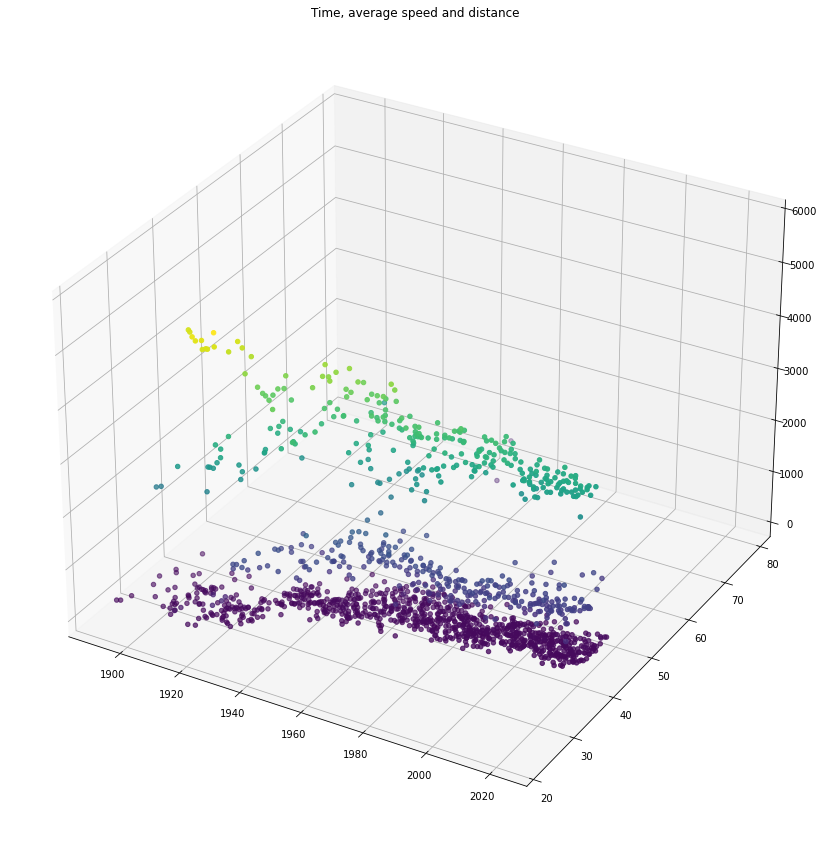

In [8]:
# Quick exploration of relationships

y = df['avg_speed']
z = df['distance']
x = df['year']


# Creating figure
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, c = z)
plt.title("Time, average speed and distance")

# show plot
plt.show()

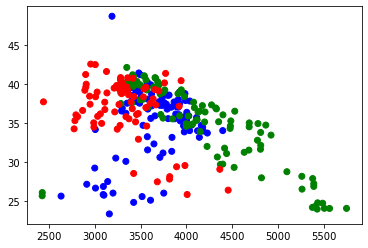

In [9]:
# Quick exploration of relationships

df_gt = df.loc[(df.race == 'giro') | (df.race == 'tdf') | (df.race == 'vuelta')]

colors = {'giro':'blue','tdf':'green','vuelta':'red'}
plt.scatter(df_gt.distance,df_gt.avg_speed,c=df_gt.race.map(colors))

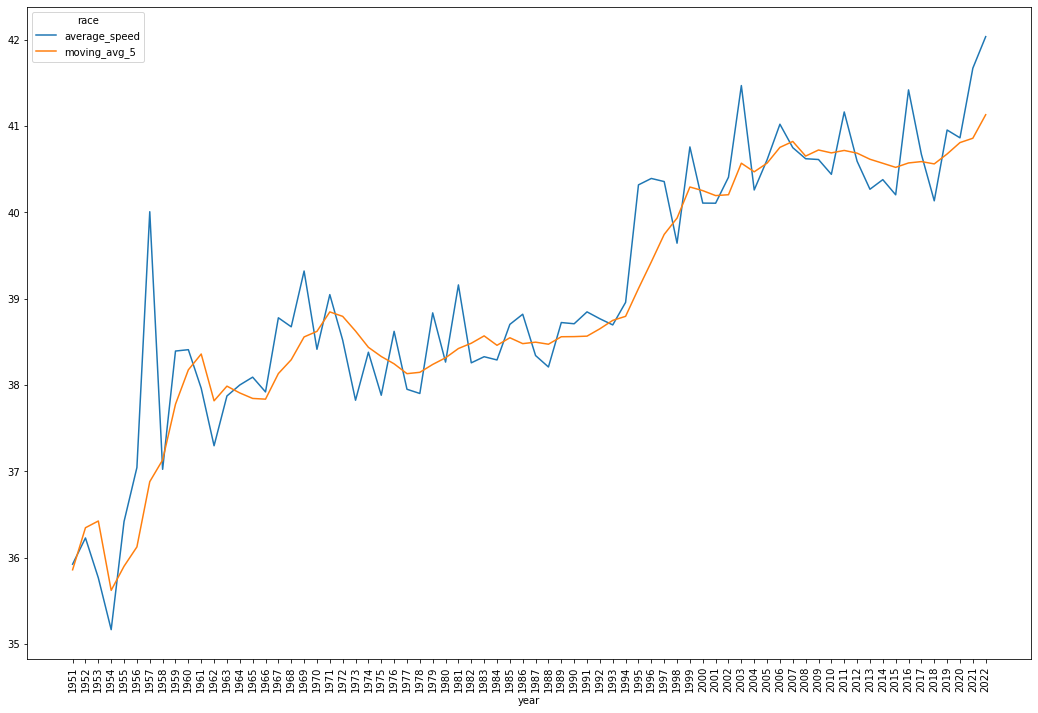

In [10]:
# Average speed
limit = 1950
race = 'all'
calc_average(limit, race, 'avg_speed','no')

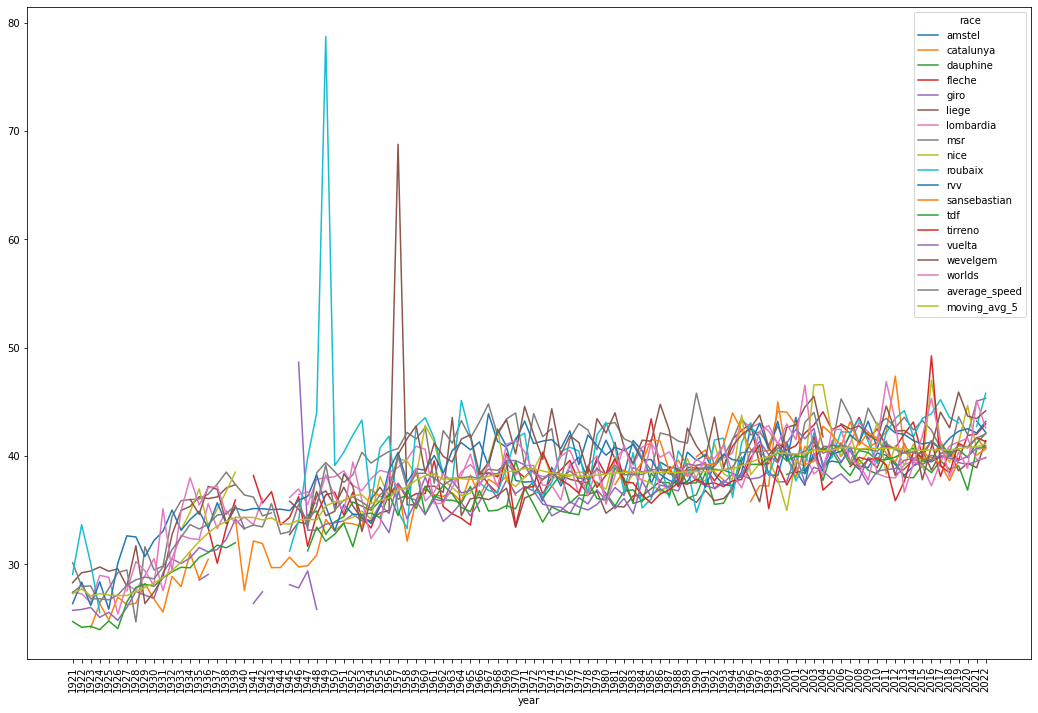

In [11]:
limit = 1920
calc_average(limit, 'all', 'avg_speed','yes')

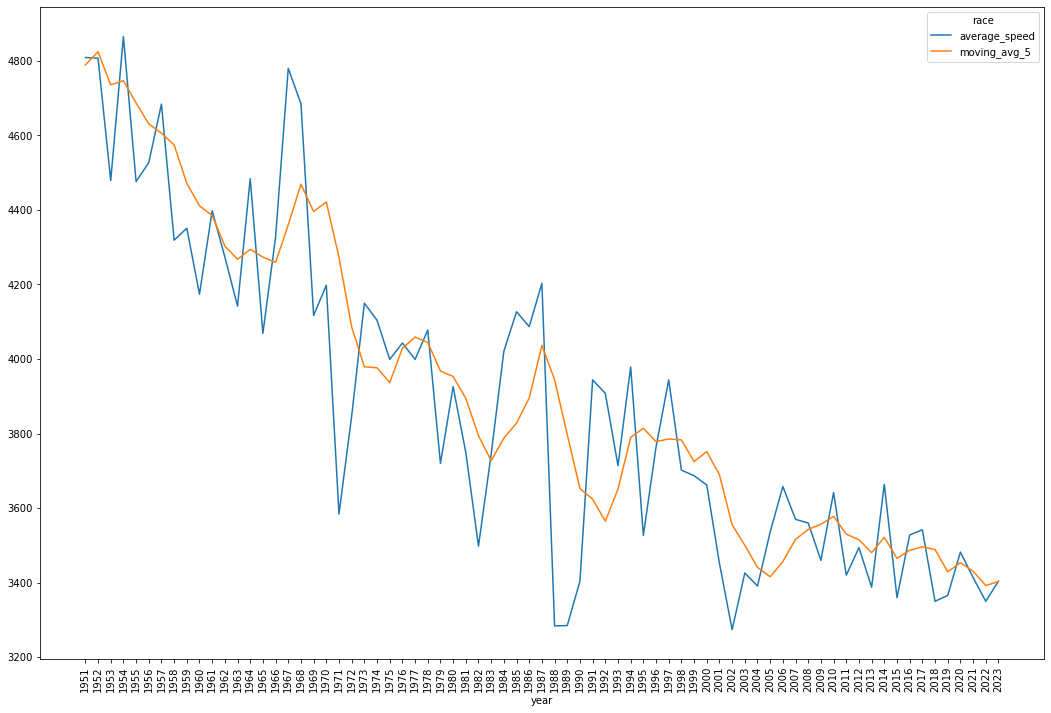

In [12]:
# Average distance
limit = 1950
race = 'tdf'
calc_average(limit, race, 'distance','no')

In [13]:
# Save data in CSV
df.to_csv('data/races_data.csv',index=False,sep='~')